<a href="https://colab.research.google.com/github/Avanish023/Machine-learning-data--science/blob/master/lbinaryclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix,classification_report



In [123]:
###### reading dataset
data=pd.read_csv("/Dataset (1).csv")
pincodes=pd.read_csv("pincodes.csv")#####external dataset

In [124]:
#####basic eda

In [125]:
data.describe()

,id,pin_code,down_payment,loan_int_rate,tenure,loan_amount,birth_year,bureau_credit_score,moratorium_optin
count,15000.00000,15000.000000,14954.000000,15000.000000,15000.000000,15000.000000,15000.000000,14589.000000,15000.000000
mean,9109.69580,468939.833800,277.244148,38.262135,43.636933,14718.962401,1988.788000,595.416547,0.234267
std,5278.55478,203155.744075,2019.157606,3.027804,4.659975,25690.265686,7.498142,222.771374,0.423554
min,1.00000,110001.000000,0.000000,2.000000,39.000000,295.531800,1954.000000,300.000000,0.000000
25%,4522.25000,331951.500000,0.000000,38.000000,39.000000,4739.040000,1985.000000,300.000000,0.000000
50%,9113.50000,500050.000000,0.000000,38.240000,42.000000,7898.400000,1990.000000,704.000000,0.000000
75%,13678.25000,591103.500000,0.000000,38.240000,49.000000,13822.200000,1994.000000,783.000000,0.000000
max,18267.00000,855113.000000,43223.994000,58.000000,75.000000,296190.000000,2002.000000,900.000000,1.000000


In [126]:
data.shape

(15000, 13)

In [127]:
data.isna().sum()

id                       0
pin_code                 0
down_payment            46
loan_int_rate            0
tenure                   0
loan_amount              0
sector                   0
mandate_source         281
gender                   1
city                     0
birth_year               0
bureau_credit_score    411
moratorium_optin         0
dtype: int64

In [128]:
##### finding unique values in each column
for i in data.columns:
  print(i, len(data[i].unique()))

id 15000
pin_code 5593
down_payment 185
loan_int_rate 22
tenure 13
loan_amount 3969
sector 7
mandate_source 6
gender 3
city 1325
birth_year 49
bureau_credit_score 404
moratorium_optin 2


In [129]:
##### filling up the missing values 
#### for catagorical with mode and for numerical with
data['down_payment'].fillna(data['down_payment'].mean(),inplace=True)
data['bureau_credit_score'].fillna(data['bureau_credit_score'].mean(),inplace=True)
data['mandate_source'].fillna(data['mandate_source'].mode(),inplace=True)

In [130]:
######## univariate analysis

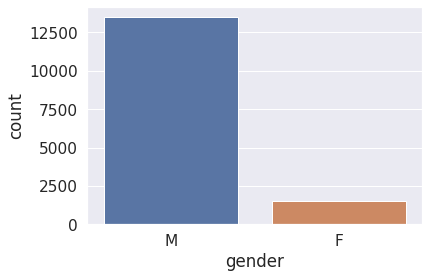

In [131]:
sns.countplot(data=data,x='gender')

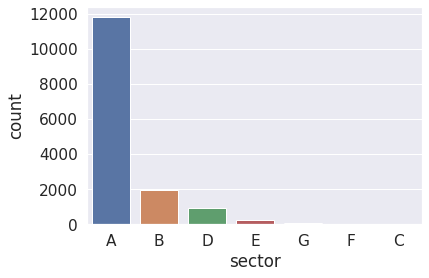

In [132]:
sns.countplot(data=data,x='sector')

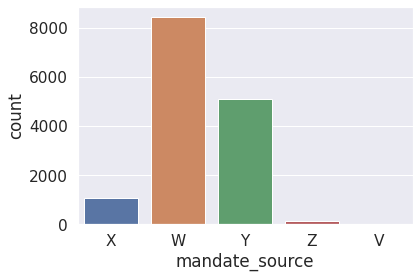

In [133]:
sns.countplot(data=data,x='mandate_source')


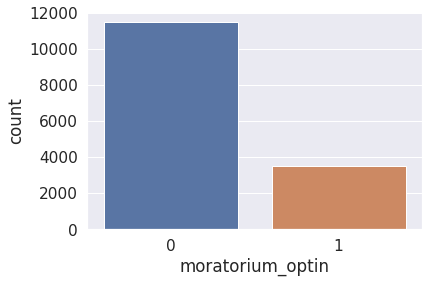

In [134]:

sns.countplot(data=data,x='moratorium_optin')


In [135]:
##### there more than 5000 pincodes and 1500 cites , will create some extra features based on the external data sets

In [136]:
pincodes=pincodes[['Pincode','DistrictsName','City','State']]
pincodes.rename(columns={'Pincode':'pin_code'},inplace=True)
pincodes=pincodes.drop_duplicates(subset=['pin_code'])
data=pd.merge(data,pincodes,on='pin_code',how='left')
print(data.shape)

(15000, 16)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [137]:
#####creating age and zones columns
data['age']=2022-data['birth_year']
data['zones']=data['pin_code'].astype(str).str[0]

In [138]:
##### removing unwanted columns

In [139]:
data.drop(columns=['pin_code','birth_year','id','city'],axis=1, inplace=True)

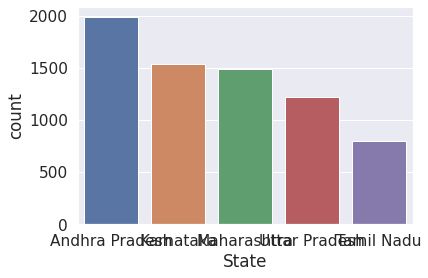

In [140]:
sns.countplot(data=data,x='State',order=data.State.value_counts().iloc[:5].index)

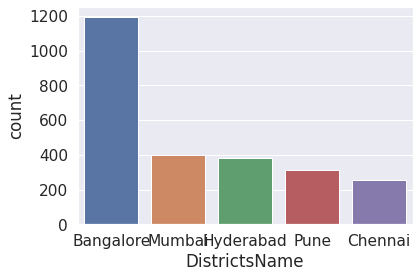

In [141]:
sns.countplot(data=data,x='DistrictsName',order=data.DistrictsName.value_counts().iloc[:5].index)

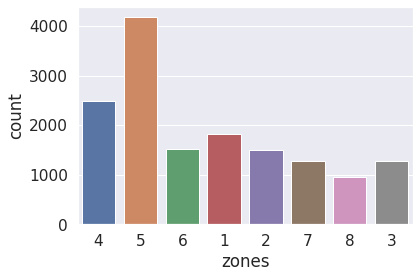

In [142]:
sns.countplot(data=data,x='zones')

In [143]:
data_boxplot=data[['down_payment', 'loan_int_rate', 'tenure', 'loan_amount','bureau_credit_score','age']]

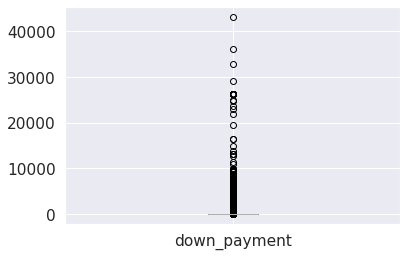

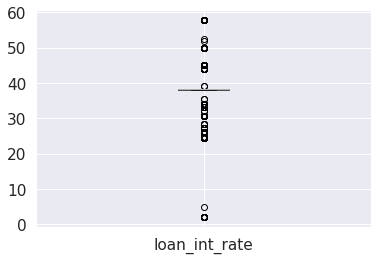

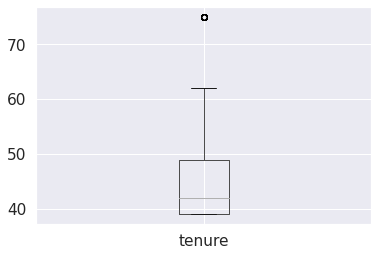

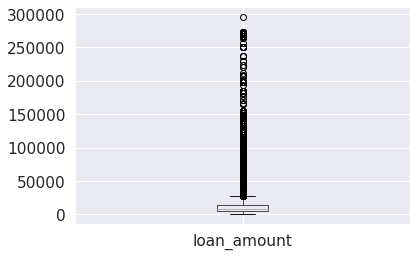

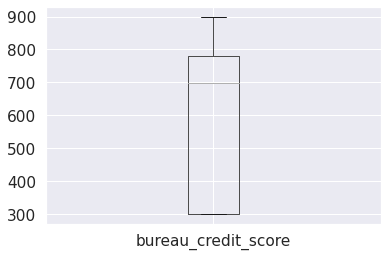

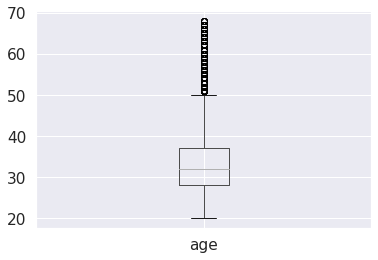

In [144]:
for column in data_boxplot:
    plt.figure()
    data_boxplot.boxplot([column])

In [145]:
#######insights from univariate analysis
#### More than 85 % are male 
#### A sector contibutes to 80% of data
#### W and Y are the main mandate source contributes to 90% of data
##### 23% of people opted for montrium
#### Data has Andra pradesh as highest no of records
#### loan intrest rate, age and tennure have outlier they might needs to be treated
#### credit score and tennure does not have any outlier



In [146]:
data.columns

Index(['down_payment', 'loan_int_rate', 'tenure', 'loan_amount', 'sector',
       'mandate_source', 'gender', 'bureau_credit_score', 'moratorium_optin',
       'DistrictsName', 'City', 'State', 'age', 'zones'],
      dtype='object')

In [147]:
##### bivariate  and multivariate analysis analyis

In [148]:
#### numerical variables
data.groupby('moratorium_optin').agg('mean')[['down_payment', 'loan_int_rate', 'tenure', 'loan_amount','bureau_credit_score','age']]

,down_payment,loan_int_rate,tenure,loan_amount,bureau_credit_score,age
moratorium_optin,,,,,,
0,347.329889,38.246758,43.495647,16038.495849,594.906244,33.131726
1,48.159112,38.312396,44.098748,10405.882953,597.084542,33.474388


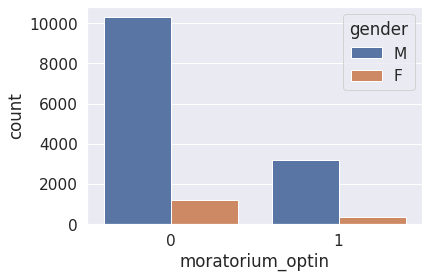

In [149]:
sns.countplot(data=data,x='moratorium_optin',hue='gender')

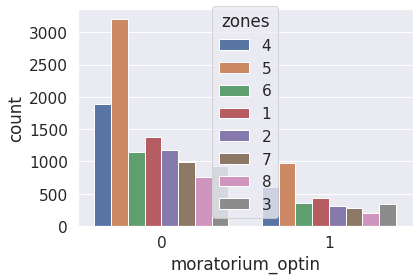

In [150]:
sns.countplot(data=data,x='moratorium_optin',hue='zones')

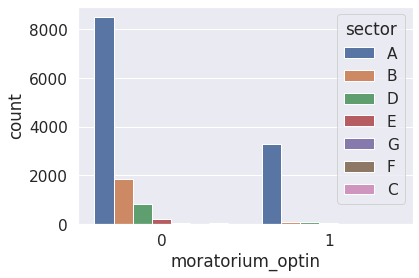

In [151]:
sns.countplot(data=data,x='moratorium_optin',hue='sector')

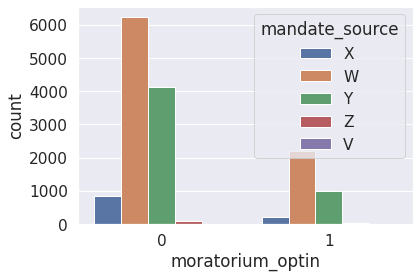

In [152]:
sns.countplot(data=data,x='moratorium_optin',hue='mandate_source')

In [153]:
####### state wise analysis

In [154]:
pt=pd.crosstab(data['State'],data['moratorium_optin']).reset_index()
pt.columns=['State', '0', '1']
pt['motatorium_rate']=(pt['1']/(pt['0']+pt['1']))*100
pt.sort_values(['motatorium_rate'],ascending=False,inplace=True)

In [155]:
pt['state_group']=np.where(pt['motatorium_rate']>25,"H",np.where(pt['motatorium_rate']<15,"L","M"))

In [156]:
pt

,State,0,1,motatorium_rate,state_group
8,Daman & Diu,3,3,50.000000,H
5,Chandigarh,20,11,35.483871,H
32,Uttaranchal,65,28,30.107527,H
28,Sikkim,7,3,30.000000,H
11,Gujarat,390,167,29.982047,H
30,Tripura,17,7,29.166667,H
10,Goa,17,7,29.166667,H
33,West Bengal,380,145,27.619048,H
2,Arunachal Pradesh,11,4,26.666667,H
26,Punjab,178,64,26.446281,H


In [157]:
pt=pt[['State','state_group']]

In [158]:
####### city wise analysis

In [159]:
ct

,City,city_group
769,Namchi,H
290,Depalpur,H
285,Deeg,H
606,Kotdwar,H
609,Kozhenchery,H
...,...,...
688,Mandla,L
689,Mandleshwar,L
241,Chembakur,L
692,Mangaldoi,L


In [160]:
ct=pd.crosstab(data['City'],data['moratorium_optin']).reset_index()
ct.columns=['City', '0', '1']
ct['motatorium_rate']=(ct['1']/(ct['0']+ct['1']))*100
ct.sort_values(['motatorium_rate'],ascending=False,inplace=True)
ct['city_group']=np.where(ct['motatorium_rate']>75,"H",np.where(ct['motatorium_rate']<25,"L","M"))


In [161]:
ct

,City,0,1,motatorium_rate,city_group
769,Namchi,0,1,100.0,H
290,Depalpur,0,2,100.0,H
285,Deeg,0,1,100.0,H
606,Kotdwar,0,1,100.0,H
609,Kozhenchery,0,1,100.0,H
...,...,...,...,...,...
688,Mandla,3,0,0.0,L
689,Mandleshwar,1,0,0.0,L
241,Chembakur,1,0,0.0,L
692,Mangaldoi,2,0,0.0,L


In [162]:
ct=ct[['City','city_group']]

In [163]:
data=pd.merge(data,pt,on="State",how="left")
data=pd.merge(data,ct,on="City",how="left")

In [164]:
data_boxplot.corr()


,down_payment,loan_int_rate,tenure,loan_amount,bureau_credit_score,age
down_payment,1.000000,-0.092116,0.081642,0.250590,0.028499,0.084013
loan_int_rate,-0.092116,1.000000,-0.054459,-0.149744,0.004620,0.007308
tenure,0.081642,-0.054459,1.000000,0.416080,0.001719,0.117339
loan_amount,0.250590,-0.149744,0.416080,1.000000,0.049021,0.108890
bureau_credit_score,0.028499,0.004620,0.001719,0.049021,1.000000,0.062512
age,0.084013,0.007308,0.117339,0.108890,0.062512,1.000000


In [165]:
####### Insights from bivariate and multivariate analysis
##### numerical values are uncorelated
##### there is aprrox 600% and 60% change in average values of down payment and loan amount for who has opted motatorium and who has not
######### more than 85% of people opted motatorium have opted sector A
#### there are few states with people 50% of motatorium rate on an average is around 20%


In [166]:
#### dropping city will try to include if we are not getting proper accuracies 
data.drop(columns=['City','DistrictsName',"State"], inplace=True)

In [167]:
############## data prepartion and model building

In [168]:
X = data.drop(columns=['moratorium_optin'],axis=1)
y = data['moratorium_optin']

In [169]:
X.columns

Index(['down_payment', 'loan_int_rate', 'tenure', 'loan_amount', 'sector',
       'mandate_source', 'gender', 'bureau_credit_score', 'age', 'zones',
       'state_group', 'city_group'],
      dtype='object')

In [170]:
########## getting dummy variables
X=pd.get_dummies(X)


In [171]:
##### standarizing numerical variables 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled)
x_scaled.columns=X.columns

In [172]:
########## train_test_split in python
X_train, X_test,y_train, y_test = train_test_split(x_scaled,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [173]:
########### rfe and logistic regression python

In [174]:
#### logisctic regression model
classifier = LogisticRegression(random_state=0,penalty= 'l2')
classifier.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [175]:
######## predicting on first data
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.770667,0.673913,0.069507,0.126016


Test Data Accuracy: 0.7707


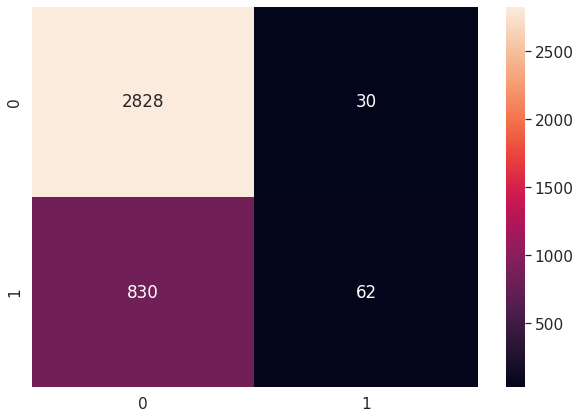

In [176]:
##### confusion matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred)) 

In [177]:
########### recursive feature selection

In [178]:
rfe = RFE(classifier, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [179]:
#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[ True  True  True  True False  True  True  True False  True  True False
 False False False  True  True False False False  True False False False
 False False False False  True  True  True  True  True False]
[ 1  1  1  1 12  1  1  1  2  1  1  6  5  8  9  1  1 11 17 10  1 14 18 16
  4 15  7 13  1  1  1  1  1  3]


Index(['down_payment', 'loan_int_rate', 'tenure', 'loan_amount', 'age',
       'sector_A', 'sector_B', 'sector_D', 'sector_E', 'mandate_source_X',
       'mandate_source_Y', 'zones_1', 'state_group_H', 'state_group_L',
       'state_group_M', 'city_group_H', 'city_group_L'],
      dtype='object')

In [180]:
# Reitting Model to the Training Set
classifier = LogisticRegression(random_state=0, penalty= 'l2')
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.770667,0.673913,0.069507,0.126016
1,Logistic Regression RFE (Lasso),0.769867,0.688312,0.059417,0.109391
